In [112]:
import numpy as np

#parameters
rad = 10
thk = 5
sep = 5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1=0,y1=0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep
    
    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []
    
    # parameters
    r1 = rad + thk
    r2 = rad
    
    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)
        
        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

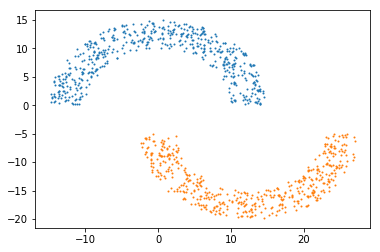

In [113]:
import matplotlib.pyplot as plt
top,bottom = generatedata(rad,thk,sep,1000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

In [114]:
# pre-processing the data for (a)
x1 = [[1] + i + [1] for i in top]
x2 = [[1] + i + [-1] for i in bottom]
data = x1 + x2
    
data = np.array(data)
np.random.shuffle(data)

In [143]:
w = np.array([[0.0],[0.0],[0.0]])
# w = np.random.randn(3,1)

In [144]:
for i in range(100):
    s = np.dot(data[:, 0:3], w)
    y_pred = np.ones((1000, 1))
    loc_n = np.where(s < 0)[0]
    y_pred[loc_n] = -1
    num_fault = len(np.where(data[:,-1] != y_pred.T)[0])
    print('Iteration %2d, wrongly classified points：%2d' % (i, num_fault))
    if num_fault == 0:
        break
    else:
        t = np.where(data[:,-1].reshape(1000,1) != y_pred)[0][0]
        w += data[t][-1] * data[t, :-1].reshape((3,1))

Iteration  0, wrongly classified points：472
Iteration  1, wrongly classified points：52
Iteration  2, wrongly classified points：257
Iteration  3, wrongly classified points：32
Iteration  4, wrongly classified points：180
Iteration  5, wrongly classified points：22
Iteration  6, wrongly classified points：140
Iteration  7, wrongly classified points：11
Iteration  8, wrongly classified points：114
Iteration  9, wrongly classified points： 8
Iteration 10, wrongly classified points：91
Iteration 11, wrongly classified points： 0


[[ 9.        ]
 [ 0.30887809]
 [35.16503397]]


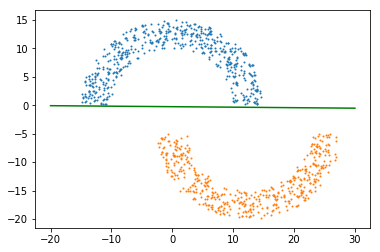

In [146]:
print(w)

x1 = -20
y1 = -1 / w[2] * (w[0] * 1 + w[1] * x1)
x2 = 30
y2 = -1 / w[2] * (w[0] * 1 + w[1] * x2)
plt.plot([x1,x2], [y1,y2], 'g')
plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

In [147]:
X = data[:,0:3]
Y = data[:,-1]

I = np.linalg.inv(np.dot(X.T, X))
w = np.dot(Y.T, np.dot(X,I))
print(w)

[ 0.26570762 -0.00971761  0.07765826]


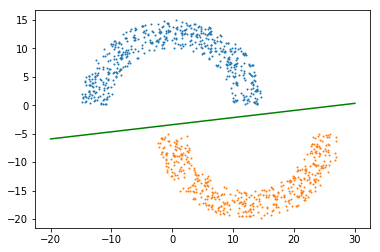

In [148]:
x1 = -20
y1 = -1 / w[2] * (w[0] * 1 + w[1] * x1)
x2 = 30
y2 = -1 / w[2] * (w[0] * 1 + w[1] * x2)
plt.plot([x1,x2], [y1,y2], 'g')
plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

# The result of Linear Regression seems better since it seems to be cut by half and half and there are some space
# on the both sides of the line, while Perceptron one is so close to on side and almost cut into the points.

In [152]:
iterations = []

for j in range(1,26):
    top,bottom = generatedata(rad,thk,j/5,1000)
    X1 = [i[0] for i in top]
    Y1 = [i[1] for i in top]

    X2 = [i[0] for i in bottom]
    Y2 = [i[1] for i in bottom]
    
    x1 = [[1] + i + [1] for i in top]
    x2 = [[1] + i + [-1] for i in bottom]
    data = x1 + x2
    
    data = np.array(data)
    np.random.shuffle(data)
    
    w = np.array([[0.0],[0.0],[0.0]])
    
    for i in range(1000):
        s = np.dot(data[:, 0:3], w)
        y_pred = np.ones((1000, 1))
        loc_n = np.where(s < 0)[0]
        y_pred[loc_n] = -1
        num_fault = len(np.where(data[:,-1] != y_pred.T)[0])
        if num_fault == 0:
            break
        else:
            t = np.where(data[:,-1].reshape(1000,1) != y_pred)[0][0]
            w += data[t][-1] * data[t, :-1].reshape((3,1))
    
    iterations.append([j/5, i]);
    
iterations = np.array(iterations)
print(iterations)

[[ 0.2 25. ]
 [ 0.4 21. ]
 [ 0.6 25. ]
 [ 0.8  9. ]
 [ 1.  17. ]
 [ 1.2  7. ]
 [ 1.4  7. ]
 [ 1.6 29. ]
 [ 1.8 15. ]
 [ 2.   8. ]
 [ 2.2 17. ]
 [ 2.4 17. ]
 [ 2.6  7. ]
 [ 2.8 33. ]
 [ 3.  14. ]
 [ 3.2 22. ]
 [ 3.4 22. ]
 [ 3.6 11. ]
 [ 3.8 10. ]
 [ 4.  15. ]
 [ 4.2 25. ]
 [ 4.4 25. ]
 [ 4.6  5. ]
 [ 4.8 14. ]
 [ 5.   4. ]]


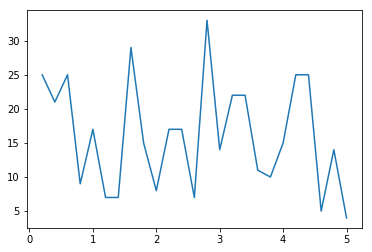

In [153]:
plt.plot(iterations[:,0], iterations[:,1])

# The iterations it takes to converge decreases while the sep increases. It seems that it is easier to cut a line 
# to seperate while the sep is bigger.

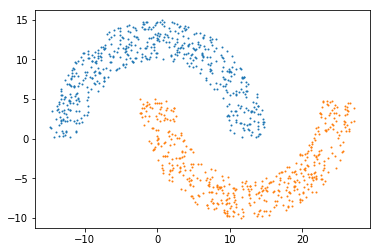

In [177]:
top,bottom = generatedata(rad,thk,-5,1000)

X11 = [i[0] for i in top]
Y11 = [i[1] for i in top]

X21 = [i[0] for i in bottom]
Y21 = [i[1] for i in bottom]

plt.scatter(X11,Y11,s = 1)
plt.scatter(X21,Y21,s = 1)
plt.show()

# PLA can not converge since this data is not linear seperable. It will keep updating.

In [178]:
x1 = [[1] + i + [1] for i in top]
x2 = [[1] + i + [-1] for i in bottom]
data = x1 + x2
    
data = np.array(data)
np.random.shuffle(data)

In [179]:
def count(data, w):
    s = np.dot(data[:, 0:3], w)
    y_pred = np.ones((1000, 1))
    loc_n = np.where(s < 0)[0]
    y_pred[loc_n] = -1
    num_fault = len(np.where(data[:,-1] != y_pred.T)[0])
    return num_fault

In [222]:
# w = np.random.randn(3,1)
w = np.array([[0.0],[0.0],[0.0]])
w_pocket = w
print(w)
E_in_pocket = count(data, w) / (data.shape[0])
print(E_in_pocket)

[[0.]
 [0.]
 [0.]]
0.479


In [223]:
Eiterations = []
E = []

for i in range(100):
    s = np.dot(data[:, 0:3], w)
    y_pred = np.ones((1000, 1))
    loc_n = np.where(s < 0)[0]
    y_pred[loc_n] = -1
    dif = np.where(data[:,-1] != y_pred.T)
    dif = np.array(dif)
    num_fault = dif.shape[1]
    if num_fault == 0:
        print('Total %2d iterations' % (i))
        break
#     print(num_fault)
    trand = np.random.randint(0, num_fault)
#     print(t)
#     print(dif[1][t])
    t = dif[1][trand]
    w = w_pocket + data[t][-1] * data[t, :-1].reshape((3,1))
    E_in = count(data, w) / (data.shape[0])
#     print('Iteration: %2d ,E_in: %f, E_in_pocket: %f' % (i, E_in, E_in_pocket))
    if E_in < E_in_pocket:
        w_pocket = w
        E_in_pocket = E_in
    
    Eiterations.append(i)
    E.append(E_in_pocket)

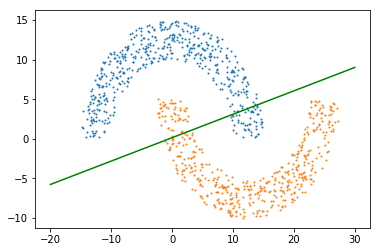

In [224]:
x1 = -20
y1 = -1 / w[2] * (w[0] * 1 + w[1] * x1)
x2 = 30
y2 = -1 / w[2] * (w[0] * 1 + w[1] * x2)
plt.plot([x1,x2], [y1,y2], 'g')
plt.scatter(X11,Y11,s = 1)
plt.scatter(X21,Y21,s = 1)
plt.show()

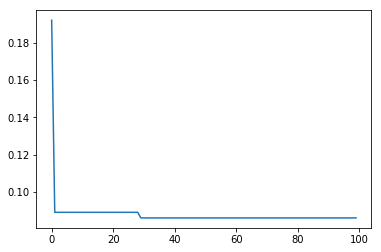

In [225]:
plt.plot(Eiterations, E)

In [226]:
# linear regression:
X = data[:,0:3]
Y = data[:,-1]

I = np.linalg.inv(np.dot(X.T, X))
wl = np.dot(Y.T, np.dot(X,I))
print(wl)

[-0.1064157  -0.02280744  0.0984964 ]


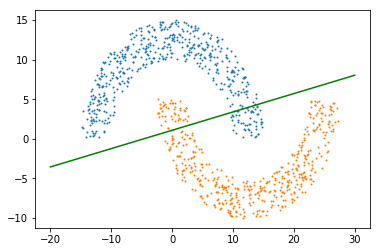

In [227]:
x1 = -20
y1 = -1 / wl[2] * (wl[0] * 1 + wl[1] * x1)
x2 = 30
y2 = -1 / wl[2] * (wl[0] * 1 + wl[1] * x2)
plt.plot([x1,x2], [y1,y2], 'g')
plt.scatter(X11,Y11,s = 1)
plt.scatter(X21,Y21,s = 1)
plt.show()